In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial'+\
                                '/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
wine['color'].value_counts()

0    4898
1    1599
Name: color, dtype: int64

In [3]:
y = wine['color']
X = wine.drop(['color'], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size=0.2, random_state=13)

In [5]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1]), array([3913, 1284]))

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.)
log_reg.fit(X_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
from sklearn.metrics import accuracy_score

pred = log_reg.predict(X_train)
accuracy_score(y_train, pred)

0.9876852030017318

In [8]:
pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)

0.9876923076923076

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[980,   5],
       [ 11, 304]])

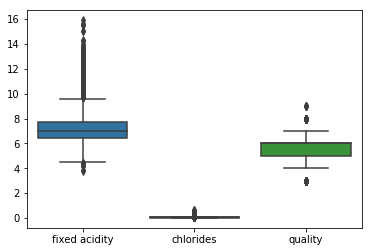

In [10]:
import seaborn as sns

sns.boxplot(data=X[['fixed acidity', 'chlorides', 'quality']])

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

In [0]:
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

In [13]:
X_ss_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230


In [14]:
X_mms_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333


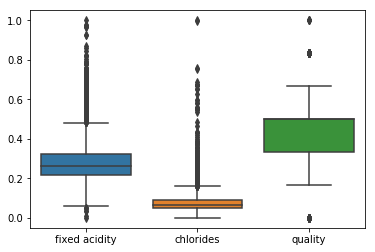

In [15]:
sns.boxplot(data=X_mms_pd[['fixed acidity', 'chlorides', 'quality']])

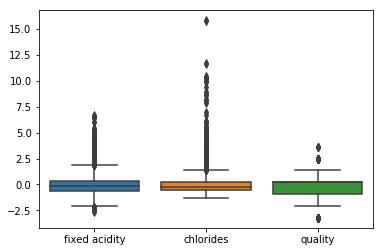

In [16]:
sns.boxplot(data=X_ss_pd[['fixed acidity', 'chlorides', 'quality']])

In [17]:
X_out = X_mms_pd
X_train, X_test, y_train, y_test = \
                    train_test_split(X_out, y, test_size=0.2, random_state=13)

log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)

0.9884615384615385

In [18]:
X_out = X_ss_pd
X_train, X_test, y_train, y_test = \
                    train_test_split(X_out, y, test_size=0.2, random_state=13)

log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)

0.9969230769230769

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=13)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [20]:
pred = tree_clf.predict(X_train)
accuracy_score(y_train, pred)

0.9553588608812776

In [21]:
pred = tree_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9569230769230769

In [22]:
confusion_matrix(y_test, pred)

array([[939,  46],
       [ 10, 305]])

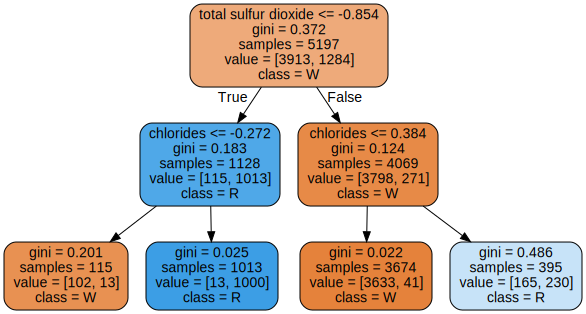

In [23]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(tree_clf, feature_names=X_train.columns,
                       class_names=['W', 'R'],
                       rounded=True, filled=True))

In [30]:
log_reg.coef_

array([[-0.93967546,  1.038703  , -0.26559718, -4.24947395,  0.76956785,
         0.79969063, -2.82420229,  6.51211746, -0.47684851,  0.27614568,
         2.58407751,  0.53086111]])